In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot,iplot
import cufflinks as cf
pd.options.plotting.backend = "plotly"
cf.go_offline()

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
os.getcwd()

'/Users/jesusarredondo/Documents/Diplomado/Proyecto/Modulo 2'

In [4]:
#Importamos la base concatenada
path = os.getcwd()[:-8]
path

'/Users/jesusarredondo/Documents/Diplomado/Proyecto/'

In [5]:
df_mexico=pd.read_csv(path+"Mode_dataframe.csv",encoding="utf-8")
df_mexico.head(5)

,FECHA_SINTOMAS,EDAD,ORIGEN,SECTOR,SEXO,MUNICIPIO_RES,EMBARAZO,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,UCI,Estado,Diagnostico,TIPO_PACIENTE
0,2020-08-17,51,USMER,SSA,HOMBRE,IZTAPALAPA,NO APLICA,SI,NO,NO APLICA,Vivo,Negativo,AMBULATORIO
1,2020-12-28,47,USMER,SSA,MUJER,VENUSTIANO CARRANZA,NO,NO,SI,NO APLICA,Vivo,Negativo,AMBULATORIO
2,2020-07-01,62,FUERA DE USMER,SSA,HOMBRE,VENUSTIANO CARRANZA,NO APLICA,NO,NO,NO APLICA,Vivo,Sospechoso,AMBULATORIO
3,2020-09-23,67,USMER,SSA,MUJER,CUAJIMALPA DE MORELOS,NO,SI,NO,NO APLICA,Vivo,Positivo,AMBULATORIO
4,2020-06-12,13,FUERA DE USMER,SSA,MUJER,AZCAPOTZALCO,NO,SI,NO,NO APLICA,Vivo,Negativo,AMBULATORIO


In [6]:
df_mexico.shape

(6458242, 13)

## Ingenieria de variables y reducción de dimensiones

In [7]:
#Separamos los dias y los meses de fecha sintomas
df_mexico["Dia"]=df_mexico["FECHA_SINTOMAS"].map(lambda x:x.split("-")[2]).astype(int)
df_mexico["Mes"]=df_mexico["FECHA_SINTOMAS"].map(lambda x:x.split("-")[1]).astype(int)
df_mexico.head(5)

,FECHA_SINTOMAS,EDAD,ORIGEN,SECTOR,SEXO,MUNICIPIO_RES,EMBARAZO,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,UCI,Estado,Diagnostico,TIPO_PACIENTE,Dia,Mes
0,2020-08-17,51,USMER,SSA,HOMBRE,IZTAPALAPA,NO APLICA,SI,NO,NO APLICA,Vivo,Negativo,AMBULATORIO,17,8
1,2020-12-28,47,USMER,SSA,MUJER,VENUSTIANO CARRANZA,NO,NO,SI,NO APLICA,Vivo,Negativo,AMBULATORIO,28,12
2,2020-07-01,62,FUERA DE USMER,SSA,HOMBRE,VENUSTIANO CARRANZA,NO APLICA,NO,NO,NO APLICA,Vivo,Sospechoso,AMBULATORIO,1,7
3,2020-09-23,67,USMER,SSA,MUJER,CUAJIMALPA DE MORELOS,NO,SI,NO,NO APLICA,Vivo,Positivo,AMBULATORIO,23,9
4,2020-06-12,13,FUERA DE USMER,SSA,MUJER,AZCAPOTZALCO,NO,SI,NO,NO APLICA,Vivo,Negativo,AMBULATORIO,12,6


In [8]:
df_mexico["Dia"].unique()

array([17, 28,  1, 23, 12, 18, 20, 10, 16,  4,  6,  3, 21, 14, 15, 13, 22,
       30,  2, 29,  8,  9, 11,  7,  5, 26, 27, 24, 25, 19, 31])

In [9]:
#Eliminamos fecha sintomas dado que no nos importa el año
df_mexico.drop(["FECHA_SINTOMAS"],axis=1,inplace=True)

In [10]:
#Checamos la correlacion de las variables continuas con la variable objetivo de Estado
correlaciones = df_mexico[[x for x in df_mexico]].corr(method="spearman")
correlaciones

,EDAD,Dia,Mes
EDAD,1.000000,-0.001617,-0.032648
Dia,-0.001617,1.000000,0.068082
Mes,-0.032648,0.068082,1.000000


In [11]:
#Volvemos la variable objetivo en 1:Muerto 0:Vivo
df_mexico["Estado"].unique()

array(['Vivo', 'Muerto'], dtype=object)

In [12]:
diccionario_estado={"Vivo":0,"Muerto":1}
df_mexico["Estado"]=df_mexico["Estado"].map(diccionario_estado)
del(diccionario_estado)
df_mexico.head(3)

,EDAD,ORIGEN,SECTOR,SEXO,MUNICIPIO_RES,EMBARAZO,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,UCI,Estado,Diagnostico,TIPO_PACIENTE,Dia,Mes
0,51,USMER,SSA,HOMBRE,IZTAPALAPA,NO APLICA,SI,NO,NO APLICA,0,Negativo,AMBULATORIO,17,8
1,47,USMER,SSA,MUJER,VENUSTIANO CARRANZA,NO,NO,SI,NO APLICA,0,Negativo,AMBULATORIO,28,12
2,62,FUERA DE USMER,SSA,HOMBRE,VENUSTIANO CARRANZA,NO APLICA,NO,NO,NO APLICA,0,Sospechoso,AMBULATORIO,1,7


In [13]:
correlacion_target=df_mexico[df_mexico.columns].corr(method="spearman")
correlacion_target=abs(correlacion_target)

In [14]:
correlacion_target

,EDAD,Estado,Dia,Mes
EDAD,1.000000,0.164303,0.001617,0.032648
Estado,0.164303,1.000000,0.000145,0.006276
Dia,0.001617,0.000145,1.000000,0.068082
Mes,0.032648,0.006276,0.068082,1.000000


In [15]:
correlacion_target[["Estado"]].sort_values(by ='Estado',ascending = False).style.background_gradient()

,Estado
Estado,1.000000
EDAD,0.164303
Mes,0.006276
Dia,0.000145


Apreciamos que el dia y mes no tienen relevancia en las muertes por covid

In [16]:
#Guardamos esa tabla
correlacion_target = correlacion_target[["Estado"]].sort_values(by ='Estado',ascending = False)
#Identificamos el index de las variables con correlación abajo de 0.1
cols_baja_corr = list(correlacion_target.loc[correlacion_target["Estado"]<0.1].index)
cols_baja_corr

['Mes', 'Dia']

In [17]:
#Eliminamos dichas columnas del dataset
df_mexico = df_mexico.drop(cols_baja_corr,axis=1)
df_mexico.head(5)

,EDAD,ORIGEN,SECTOR,SEXO,MUNICIPIO_RES,EMBARAZO,TOMA_MUESTRA_LAB,TOMA_MUESTRA_ANTIGENO,UCI,Estado,Diagnostico,TIPO_PACIENTE
0,51,USMER,SSA,HOMBRE,IZTAPALAPA,NO APLICA,SI,NO,NO APLICA,0,Negativo,AMBULATORIO
1,47,USMER,SSA,MUJER,VENUSTIANO CARRANZA,NO,NO,SI,NO APLICA,0,Negativo,AMBULATORIO
2,62,FUERA DE USMER,SSA,HOMBRE,VENUSTIANO CARRANZA,NO APLICA,NO,NO,NO APLICA,0,Sospechoso,AMBULATORIO
3,67,USMER,SSA,MUJER,CUAJIMALPA DE MORELOS,NO,SI,NO,NO APLICA,0,Positivo,AMBULATORIO
4,13,FUERA DE USMER,SSA,MUJER,AZCAPOTZALCO,NO,SI,NO,NO APLICA,0,Negativo,AMBULATORIO


Para las variables categoricas usaremos el woe

In [18]:
def iv_woe(data, target, bins=20, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [19]:
# Se aplica la función
disc=[c for c in df_mexico.columns if c != "EDAD"]
is_canceled_woe = iv_woe(df_mexico[disc], 'Estado', bins=15, show_woe=False)

Information value of ORIGEN is 0.631803
Information value of SECTOR is 1.336937
Information value of SEXO is 0.107133
Information value of MUNICIPIO_RES is 0.471485
Information value of EMBARAZO is 0.129
Information value of TOMA_MUESTRA_LAB is 0.990716
Information value of TOMA_MUESTRA_ANTIGENO is 1.117044
Information value of UCI is 5.437849
Information value of Diagnostico is 1.160868
Information value of TIPO_PACIENTE is 5.415798


In [20]:
IV=is_canceled_woe[0].sort_values(by="IV",ascending=False)
IV["Pronostico"]=np.nan
IV

,Variable,IV,Pronostico
0,UCI,5.437849,NaN
0,TIPO_PACIENTE,5.415798,NaN
0,SECTOR,1.336937,NaN
0,Diagnostico,1.160868,NaN
0,TOMA_MUESTRA_ANTIGENO,1.117044,NaN
0,TOMA_MUESTRA_LAB,0.990716,NaN
0,ORIGEN,0.631803,NaN
0,MUNICIPIO_RES,0.471485,NaN
0,EMBARAZO,0.129000,NaN
0,SEXO,0.107133,NaN


In [21]:
IV.loc[IV["IV"]<0.02,"Pronostico"]="No es útil para predecir"
IV.loc[(IV["IV"]>=0.02) & (IV["IV"]<.1),"Pronostico"]="Débil"
IV.loc[(IV["IV"]>=.1)&(IV["IV"]<.3),"Pronostico"]="Medio"
IV.loc[(IV["IV"]>=.3)&(IV["IV"]<.5),"Pronostico"]="Fuerte"
IV.loc[(IV["IV"]>=.5),"Pronostico"]="Sobrepredictiva"
IV

,Variable,IV,Pronostico
0,UCI,5.437849,Sobrepredictiva
0,TIPO_PACIENTE,5.415798,Sobrepredictiva
0,SECTOR,1.336937,Sobrepredictiva
0,Diagnostico,1.160868,Sobrepredictiva
0,TOMA_MUESTRA_ANTIGENO,1.117044,Sobrepredictiva
0,TOMA_MUESTRA_LAB,0.990716,Sobrepredictiva
0,ORIGEN,0.631803,Sobrepredictiva
0,MUNICIPIO_RES,0.471485,Fuerte
0,EMBARAZO,0.129000,Medio
0,SEXO,0.107133,Medio


Podemos ver que las variables que son sobrepredictivas para pronosticar si una persona vive o muere son:
* UCI
* Tipo de Paciente
* Sector de atención
* Diagnostico
* Toma de Antigeno
* Origen
Por lo cual las eliminaremos para evitar sobreajuste.

Ademas podemos ver que el municipio de residencia tiene una relacion fuerte como factor predictivo para nuestra variable objetivo.

In [22]:
no_ajustada=list(IV.loc[IV["Pronostico"]!="Sobrepredictiva","Variable"])
no_ajustada

['MUNICIPIO_RES', 'EMBARAZO', 'SEXO']

In [23]:
#Usamos solo las variables
df_mexico=df_mexico[["EDAD"]+no_ajustada+["Estado"]]
df_mexico.head(3)

,EDAD,MUNICIPIO_RES,EMBARAZO,SEXO,Estado
0,51,IZTAPALAPA,NO APLICA,HOMBRE,0
1,47,VENUSTIANO CARRANZA,NO,MUJER,0
2,62,VENUSTIANO CARRANZA,NO APLICA,HOMBRE,0


In [24]:
df_mexico.shape

(6458242, 5)

Para no tener tantas variables dummies, MUNICIPIO_RES y EMBARAZO, le hacemos una estandarizacion de variables

In [25]:
df_mexico["MUNICIPIO_RES"].value_counts(1,dropna=False)

IZTAPALAPA               0.127140
GUSTAVO A. MADERO        0.094671
ÁLVARO OBREGÓN           0.073407
TLALPAN                  0.056078
CUAUHTÉMOC               0.047248
                           ...   
SAN SIMÓN DE GUERRERO    0.000033
POLOTITLÁN               0.000028
PAPALOTLA                0.000028
ZACAZONAPAN              0.000026
IXTAPAN DEL ORO          0.000016
Name: MUNICIPIO_RES, Length: 142, dtype: float64

In [26]:
def pie_chart(data, col, label = 'Otros', alpha = 0.05, pct = True, colname = None):
    import plotly.express as px
    data = pd.DataFrame(data[col].value_counts(pct))
    if colname == None:
        colname = col + '_new'
    data[colname] = data.index
    data.loc[data[col] < alpha, colname] = label
    data = data[[col, colname]].groupby(colname).sum()
    fig = px.pie(data, values = col, names = data.index, title = col)
    fig.show()
pie_chart(df_mexico,col="MUNICIPIO_RES",alpha=0.02)

In [27]:
df_mexico

,EDAD,MUNICIPIO_RES,EMBARAZO,SEXO,Estado
0,51,IZTAPALAPA,NO APLICA,HOMBRE,0
1,47,VENUSTIANO CARRANZA,NO,MUJER,0
2,62,VENUSTIANO CARRANZA,NO APLICA,HOMBRE,0
3,67,CUAJIMALPA DE MORELOS,NO,MUJER,0
4,13,AZCAPOTZALCO,NO,MUJER,0
...,...,...,...,...,...
6458237,60,COACALCO DE BERRIOZÁBAL,NO APLICA,HOMBRE,0
6458238,42,TULTEPEC,NO,MUJER,0
6458239,51,TLALNEPANTLA DE BAZ,NO APLICA,HOMBRE,0
6458240,31,NAUCALPAN DE JUÁREZ,NO,MUJER,0


In [28]:
data=df_mexico.copy()
col="MUNICIPIO_RES"
data = pd.DataFrame(data[col].value_counts(1,dropna=False))
label="Otros"
colname="Municipio_res"
data[colname] = data.index
data.loc[data[col] < 0.02, colname] = label
data

,MUNICIPIO_RES,Municipio_res
IZTAPALAPA,0.127140,IZTAPALAPA
GUSTAVO A. MADERO,0.094671,GUSTAVO A. MADERO
ÁLVARO OBREGÓN,0.073407,ÁLVARO OBREGÓN
TLALPAN,0.056078,TLALPAN
CUAUHTÉMOC,0.047248,CUAUHTÉMOC
...,...,...
SAN SIMÓN DE GUERRERO,0.000033,Otros
POLOTITLÁN,0.000028,Otros
PAPALOTLA,0.000028,Otros
ZACAZONAPAN,0.000026,Otros


In [29]:
diccionario_municipio=dict(zip(data.index,data["Municipio_res"]))
df_mexico["Municipio_res"]=df_mexico["MUNICIPIO_RES"].map(diccionario_municipio)
df_mexico

,EDAD,MUNICIPIO_RES,EMBARAZO,SEXO,Estado,Municipio_res
0,51,IZTAPALAPA,NO APLICA,HOMBRE,0,IZTAPALAPA
1,47,VENUSTIANO CARRANZA,NO,MUJER,0,VENUSTIANO CARRANZA
2,62,VENUSTIANO CARRANZA,NO APLICA,HOMBRE,0,VENUSTIANO CARRANZA
3,67,CUAJIMALPA DE MORELOS,NO,MUJER,0,Otros
4,13,AZCAPOTZALCO,NO,MUJER,0,AZCAPOTZALCO
...,...,...,...,...,...,...
6458237,60,COACALCO DE BERRIOZÁBAL,NO APLICA,HOMBRE,0,Otros
6458238,42,TULTEPEC,NO,MUJER,0,Otros
6458239,51,TLALNEPANTLA DE BAZ,NO APLICA,HOMBRE,0,Otros
6458240,31,NAUCALPAN DE JUÁREZ,NO,MUJER,0,Otros


In [50]:
df_mexico["Municipio_res"].value_counts(1,dropna=False)

Otros                     0.222025
IZTAPALAPA                0.127140
GUSTAVO A. MADERO         0.094671
ÁLVARO OBREGÓN            0.073407
TLALPAN                   0.056078
CUAUHTÉMOC                0.047248
COYOACÁN                  0.047017
VENUSTIANO CARRANZA       0.044825
XOCHIMILCO                0.042669
TLÁHUAC                   0.036783
AZCAPOTZALCO              0.033986
IZTACALCO                 0.032551
ECATEPEC DE MORELOS       0.031637
BENITO JUÁREZ             0.030765
NEZAHUALCÓYOTL            0.027737
MIGUEL HIDALGO            0.025934
LA MAGDALENA CONTRERAS    0.025526
Name: Municipio_res, dtype: float64

In [31]:
df_mexico.drop(["MUNICIPIO_RES"],axis=1,inplace=True)
df_mexico.head(5)

,EDAD,EMBARAZO,SEXO,Estado,Municipio_res
0,51,NO APLICA,HOMBRE,0,IZTAPALAPA
1,47,NO,MUJER,0,VENUSTIANO CARRANZA
2,62,NO APLICA,HOMBRE,0,VENUSTIANO CARRANZA
3,67,NO,MUJER,0,Otros
4,13,NO,MUJER,0,AZCAPOTZALCO


In [32]:
#Para embarazo
df_mexico["EMBARAZO"].unique()

array(['NO APLICA', 'NO ', 'SE IGNORA', 'SI ', 'NO ESPECIFICADO'],
      dtype=object)

In [33]:
#Para embarazo 1:si, 0:no
dic_embarazo={'NO APLICA':0,'NO ':0,'SE IGNORA':0,'SI ':1,'NO ESPECIFICADO':0}
df_mexico["EMBARAZO"].value_counts(1,dropna=False)

NO                 5.155530e-01
NO APLICA          4.723567e-01
SI                 7.598353e-03
SE IGNORA          4.491780e-03
NO ESPECIFICADO    1.548409e-07
Name: EMBARAZO, dtype: float64

In [34]:
df_mexico["Embarazo"]=df_mexico["EMBARAZO"].map(dic_embarazo)
df_mexico["Embarazo"].value_counts(1,dropna=False)

0    0.992402
1    0.007598
Name: Embarazo, dtype: float64

In [35]:
#Eliminamos embarazo
df_mexico.drop(["EMBARAZO"],axis=1,inplace=True)

In [36]:
df_mexico.columns

Index(['EDAD', 'SEXO', 'Estado', 'Municipio_res', 'Embarazo'], dtype='object')

In [37]:
#Checamos sexo
df_mexico["SEXO"].unique()

array(['HOMBRE', 'MUJER'], dtype=object)

In [38]:
df_mexico["SEXO"].value_counts(1,dropna=False)

MUJER     0.527643
HOMBRE    0.472357
Name: SEXO, dtype: float64

In [39]:
#Sexo mujero:0 , hombre:1
dic_sexo={"MUJER":0,"HOMBRE":1}
df_mexico["Sexo"]=df_mexico["SEXO"].map(dic_sexo)
df_mexico["Sexo"].value_counts(1,dropna=False)

0    0.527643
1    0.472357
Name: Sexo, dtype: float64

In [40]:
df_mexico.drop(["SEXO"],axis=1,inplace=True)
df_mexico.columns

Index(['EDAD', 'Estado', 'Municipio_res', 'Embarazo', 'Sexo'], dtype='object')

In [41]:
df_mexico

,EDAD,Estado,Municipio_res,Embarazo,Sexo
0,51,0,IZTAPALAPA,0,1
1,47,0,VENUSTIANO CARRANZA,0,0
2,62,0,VENUSTIANO CARRANZA,0,1
3,67,0,Otros,0,0
4,13,0,AZCAPOTZALCO,0,0
...,...,...,...,...,...
6458237,60,0,Otros,0,1
6458238,42,0,Otros,0,0
6458239,51,0,Otros,0,1
6458240,31,0,Otros,0,0


### Creación de variables dummies

In [42]:
columnas_modelo=[c for c in df_mexico.columns if c!="Municipio_res"]
df_mexico_modelo=df_mexico.drop(columns=["Municipio_res"])[columnas_modelo].join(pd.get_dummies(df_mexico[["Municipio_res"]], drop_first=True))
df_mexico_modelo

,EDAD,Estado,Embarazo,Sexo,Municipio_res_BENITO JUÁREZ,Municipio_res_COYOACÁN,Municipio_res_CUAUHTÉMOC,Municipio_res_ECATEPEC DE MORELOS,Municipio_res_GUSTAVO A. MADERO,Municipio_res_IZTACALCO,Municipio_res_IZTAPALAPA,Municipio_res_LA MAGDALENA CONTRERAS,Municipio_res_MIGUEL HIDALGO,Municipio_res_NEZAHUALCÓYOTL,Municipio_res_Otros,Municipio_res_TLALPAN,Municipio_res_TLÁHUAC,Municipio_res_VENUSTIANO CARRANZA,Municipio_res_XOCHIMILCO,Municipio_res_ÁLVARO OBREGÓN
0,51,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,62,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458237,60,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6458238,42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6458239,51,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6458240,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
df_mexico["Municipio_res"].unique()

array(['IZTAPALAPA', 'VENUSTIANO CARRANZA', 'Otros', 'AZCAPOTZALCO',
       'TLALPAN', 'GUSTAVO A. MADERO', 'ÁLVARO OBREGÓN', 'COYOACÁN',
       'TLÁHUAC', 'CUAUHTÉMOC', 'IZTACALCO', 'XOCHIMILCO',
       'BENITO JUÁREZ', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO',
       'ECATEPEC DE MORELOS', 'NEZAHUALCÓYOTL'], dtype=object)

In [44]:
df_mexico_modelo.columns #La columna eliminada fue azcapotzalco

Index(['EDAD', 'Estado', 'Embarazo', 'Sexo', 'Municipio_res_BENITO JUÁREZ',
       'Municipio_res_COYOACÁN', 'Municipio_res_CUAUHTÉMOC',
       'Municipio_res_ECATEPEC DE MORELOS', 'Municipio_res_GUSTAVO A. MADERO',
       'Municipio_res_IZTACALCO', 'Municipio_res_IZTAPALAPA',
       'Municipio_res_LA MAGDALENA CONTRERAS', 'Municipio_res_MIGUEL HIDALGO',
       'Municipio_res_NEZAHUALCÓYOTL', 'Municipio_res_Otros',
       'Municipio_res_TLALPAN', 'Municipio_res_TLÁHUAC',
       'Municipio_res_VENUSTIANO CARRANZA', 'Municipio_res_XOCHIMILCO',
       'Municipio_res_ÁLVARO OBREGÓN'],
      dtype='object')

# Separacion de datos y eliminacion de outliers

In [45]:
predictoras=[c for c in df_mexico_modelo if c!="Estado"]
objetivo=["Estado"]

In [46]:
predictoras

['EDAD',
 'Embarazo',
 'Sexo',
 'Municipio_res_BENITO JUÁREZ',
 'Municipio_res_COYOACÁN',
 'Municipio_res_CUAUHTÉMOC',
 'Municipio_res_ECATEPEC DE MORELOS',
 'Municipio_res_GUSTAVO A. MADERO',
 'Municipio_res_IZTACALCO',
 'Municipio_res_IZTAPALAPA',
 'Municipio_res_LA MAGDALENA CONTRERAS',
 'Municipio_res_MIGUEL HIDALGO',
 'Municipio_res_NEZAHUALCÓYOTL',
 'Municipio_res_Otros',
 'Municipio_res_TLALPAN',
 'Municipio_res_TLÁHUAC',
 'Municipio_res_VENUSTIANO CARRANZA',
 'Municipio_res_XOCHIMILCO',
 'Municipio_res_ÁLVARO OBREGÓN']

In [47]:
#Separamos en X e y
X=df_mexico_modelo[predictoras]
y=df_mexico_modelo[objetivo]

In [48]:
y["Estado"].value_counts(dropna=False)

0    6342234
1     116008
Name: Estado, dtype: int64

In [50]:
#Separamos en entrenamiento y test

In [51]:
X.shape

(6458242, 19)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [54]:
X_train.shape

(4520769, 19)

In [55]:
#Eliminamos outliers con el Z-score
def zscore(df, column, alpha = 2):
    
    import scipy.stats as stats
    
    df[column + '_zscore'] = stats.zscore(df[column])
    
    aux = df.loc[abs(df[column + '_zscore']) < alpha].copy()
    
    aux.drop([column + '_zscore'],axis=1,inplace=True)
    
    return(aux)
X_train=zscore(X_train,column="EDAD",alpha=3)
X_train.shape

(4509074, 19)

In [56]:
4509074/4520769

0.9974130507442428

In [57]:
#Nos quedamos con los indices de X_train para y_train
train_index=X_train.index
train_index

Int64Index([3303861, 6066183, 2528909, 1083026,  957076,  677208,  248972,
            5318205,   41242,   28279,
            ...
            4930630, 2832983,  374564, 5853461, 2219731, 2249467, 5157699,
            2215104, 1484405, 4500015],
           dtype='int64', length=4509074)

In [58]:
y_train.shape

(4520769, 1)

In [59]:
y_train=y_train.loc[train_index]
y_train.shape

(4509074, 1)

In [60]:
(y_train.index==X_train.index).sum()

4509074

In [61]:
X_train["EDAD"].describe()

count    4.509074e+06
mean     3.846774e+01
std      1.671798e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      8.900000e+01
Name: EDAD, dtype: float64

Edad maxima del conjunto de entrenamiento es 89

In [62]:
X_test.shape

(1937473, 19)

In [63]:
#Para el test hacemos lo mismo
X_test=zscore(X_test,column="EDAD",alpha=3)
X_test.shape

(1932535, 19)

In [64]:
X_test["EDAD"].describe()

count    1.932535e+06
mean     3.845065e+01
std      1.673313e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      8.900000e+01
Name: EDAD, dtype: float64

In [65]:
1932535/1937473

0.9974513193216112

In [66]:
#Nos quedamos con los indices de X_test para y_test
test_index=X_test.index
test_index

Int64Index([5901195, 3390104, 2570922, 2525212, 2134063, 1944999, 5346476,
            1306400, 4204559,  609354,
            ...
            4851756,  351766,  497352, 1535120, 1173363, 3765826,  272021,
             499948, 4667326, 4766398],
           dtype='int64', length=1932535)

In [67]:
y_test.shape

(1937473, 1)

In [68]:
y_test=y_test.loc[test_index]
y_test.shape

(1932535, 1)

In [69]:
(y_test.index==X_test.index).sum()

1932535

# Modelacion supervisada

In [70]:
y_train

,Estado
3303861,0
6066183,0
2528909,0
1083026,0
957076,0
...,...
2249467,0
5157699,0
2215104,0
1484405,0


In [71]:
y_train["Estado"].value_counts(1,dropna=False)

0    0.982344
1    0.017656
Name: Estado, dtype: float64

In [72]:
y_test["Estado"].value_counts(1,dropna=False)

0    0.982318
1    0.017682
Name: Estado, dtype: float64

In [73]:
X_train.isnull().any()

EDAD                                    False
Embarazo                                False
Sexo                                    False
Municipio_res_BENITO JUÁREZ             False
Municipio_res_COYOACÁN                  False
Municipio_res_CUAUHTÉMOC                False
Municipio_res_ECATEPEC DE MORELOS       False
Municipio_res_GUSTAVO A. MADERO         False
Municipio_res_IZTACALCO                 False
Municipio_res_IZTAPALAPA                False
Municipio_res_LA MAGDALENA CONTRERAS    False
Municipio_res_MIGUEL HIDALGO            False
Municipio_res_NEZAHUALCÓYOTL            False
Municipio_res_Otros                     False
Municipio_res_TLALPAN                   False
Municipio_res_TLÁHUAC                   False
Municipio_res_VENUSTIANO CARRANZA       False
Municipio_res_XOCHIMILCO                False
Municipio_res_ÁLVARO OBREGÓN            False
dtype: bool

## Rembalanceamos la variable objetivo

### Train

In [74]:
train=pd.concat([X_train,y_train],axis=1)
train

,EDAD,Embarazo,Sexo,Municipio_res_BENITO JUÁREZ,Municipio_res_COYOACÁN,Municipio_res_CUAUHTÉMOC,Municipio_res_ECATEPEC DE MORELOS,Municipio_res_GUSTAVO A. MADERO,Municipio_res_IZTACALCO,Municipio_res_IZTAPALAPA,Municipio_res_LA MAGDALENA CONTRERAS,Municipio_res_MIGUEL HIDALGO,Municipio_res_NEZAHUALCÓYOTL,Municipio_res_Otros,Municipio_res_TLALPAN,Municipio_res_TLÁHUAC,Municipio_res_VENUSTIANO CARRANZA,Municipio_res_XOCHIMILCO,Municipio_res_ÁLVARO OBREGÓN,Estado
3303861,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6066183,43,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2528909,78,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1083026,57,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
957076,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,46,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5157699,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2215104,76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1484405,74,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Target variable count')

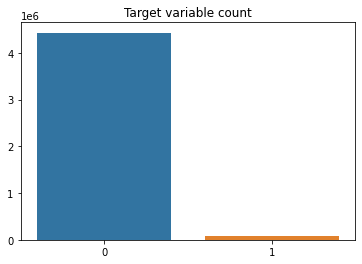

In [75]:
x=train['Estado'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Target variable count')

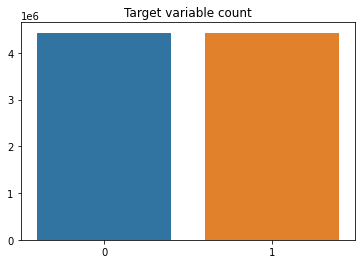

In [77]:
x=y_sm_train.value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [79]:
y_sm_train["Estado"].value_counts(1,dropna=False)

0    0.5
1    0.5
Name: Estado, dtype: float64

In [83]:
X_sm_train

,EDAD,Embarazo,Sexo,Municipio_res_BENITO JUÁREZ,Municipio_res_COYOACÁN,Municipio_res_CUAUHTÉMOC,Municipio_res_ECATEPEC DE MORELOS,Municipio_res_GUSTAVO A. MADERO,Municipio_res_IZTACALCO,Municipio_res_IZTAPALAPA,Municipio_res_LA MAGDALENA CONTRERAS,Municipio_res_MIGUEL HIDALGO,Municipio_res_NEZAHUALCÓYOTL,Municipio_res_Otros,Municipio_res_TLALPAN,Municipio_res_TLÁHUAC,Municipio_res_VENUSTIANO CARRANZA,Municipio_res_XOCHIMILCO,Municipio_res_ÁLVARO OBREGÓN
0,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,78,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,57,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858915,28,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8858916,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8858917,54,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8858918,71,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Regresión Logistica

In [84]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(solver='liblinear',penalty='l1') #Penalizamos con lasso

In [85]:
logistic.fit(X_sm_train,y_sm_train)

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(penalty='l1', solver='liblinear')

In [107]:
ls_res = cross_val_score(estimator = logistic, X=X_sm_train, y=y_sm_train, cv=5, n_jobs=-1, scoring="roc_auc")
np.mean(ls_res),np.std(ls_res)

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/li

(0.8836445554481976, 0.00021751253722076622)

In [86]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
def metricas_clasif(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [88]:
metricas_clasif(logistic,X_sm_train,y_sm_train)

 Roc Validate: 0.884
 Acc Validate: 0.806
 Matrix Conf Validate:  
 [[3522230  907230]
 [ 812460 3617000]]


In [90]:
metricas_clasif(logistic,X_test,y_test)

 Roc Validate: 0.882
 Acc Validate: 0.796
 Matrix Conf Validate:  
 [[1509577  388787]
 [   6334   27837]]


In [94]:
from sklearn.metrics import f1_score
f1_score(y_pred=logistic.predict(X_test),y_true=y_test,pos_label=1)

0.12350181346288222

In [93]:
f1_score(y_pred=logistic.predict(X_test),y_true=y_test,pos_label=0)

0.8842738209429528

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_sm_train,logistic.predict(X_sm_train)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80   4429460
           1       0.80      0.82      0.81   4429460

    accuracy                           0.81   8858920
   macro avg       0.81      0.81      0.81   8858920
weighted avg       0.81      0.81      0.81   8858920



In [98]:
print(classification_report(y_test,logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.88   1898364
           1       0.07      0.81      0.12     34171

    accuracy                           0.80   1932535
   macro avg       0.53      0.80      0.50   1932535
weighted avg       0.98      0.80      0.87   1932535



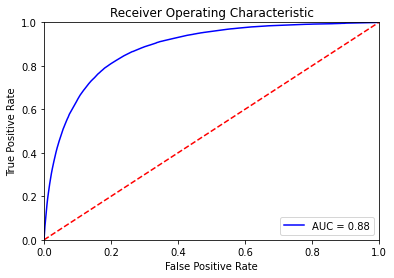

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
pd.to_pickle(logistic,"RegresionLog.pkl")

In [103]:
Coeficientes=pd.DataFrame()
Coeficientes["Variable"]=list(X_train.columns)
Coeficientes["Coeficiente"]=logistic.coef_.tolist()[0]
Coeficientes.sort_values(by="Coeficiente",ascending=False)

,Variable,Coeficiente
2,Sexo,0.788011
6,Municipio_res_ECATEPEC DE MORELOS,0.678334
13,Municipio_res_Otros,0.597092
12,Municipio_res_NEZAHUALCÓYOTL,0.295356
0,EDAD,0.093878
8,Municipio_res_IZTACALCO,-0.461837
9,Municipio_res_IZTAPALAPA,-0.494628
7,Municipio_res_GUSTAVO A. MADERO,-0.548155
11,Municipio_res_MIGUEL HIDALGO,-0.740648
5,Municipio_res_CUAUHTÉMOC,-0.768321


## Arbol de decision

In [104]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier()

In [106]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
ls_res = cross_val_score(estimator = tree, X=X_sm_train, y=y_sm_train, cv=5, n_jobs=-1, scoring="roc_auc")
np.mean(ls_res),np.std(ls_res)

(0.8886469759692975, 0.0002523989959462671)

In [108]:
metricas_clasif(tree,X_sm_train,y_sm_train)

 Roc Validate: 0.889
 Acc Validate: 0.808
 Matrix Conf Validate:  
 [[3483412  946048]
 [ 755925 3673535]]


In [110]:
metricas_clasif(tree,X_test,y_test)

 Roc Validate: 0.882
 Acc Validate: 0.787
 Matrix Conf Validate:  
 [[1492580  405784]
 [   6065   28106]]


In [111]:
f1_score(y_pred=tree.predict(X_test),y_true=y_test,pos_label=1)

0.12009545764334136

In [112]:
f1_score(y_pred=tree.predict(X_test),y_true=y_test,pos_label=0)

0.8787612867672707

In [113]:
print(classification_report(y_sm_train,tree.predict(X_sm_train)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80   4429460
           1       0.80      0.83      0.81   4429460

    accuracy                           0.81   8858920
   macro avg       0.81      0.81      0.81   8858920
weighted avg       0.81      0.81      0.81   8858920



In [115]:
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88   1898364
           1       0.06      0.82      0.12     34171

    accuracy                           0.79   1932535
   macro avg       0.53      0.80      0.50   1932535
weighted avg       0.98      0.79      0.87   1932535



In [51]:
tree=pd.read_pickle('Arbol.pkl')

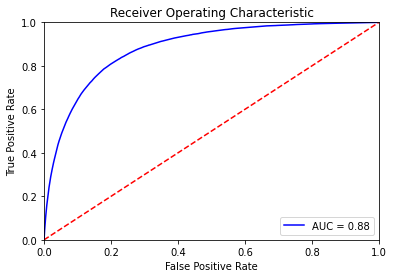

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,tree.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
importances=tree.feature_importances_
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

df_importances = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importances['importance'])
feature= list(df_importances['feature'])
df_importances

,importance,feature
0,0.851336,EDAD
1,0.065161,Municipio_res_Otros
2,0.043115,Sexo
3,0.018275,Municipio_res_ECATEPEC DE MORELOS
4,0.008755,Municipio_res_NEZAHUALCÓYOTL
5,0.001436,Municipio_res_IZTAPALAPA
6,0.001344,Municipio_res_VENUSTIANO CARRANZA
7,0.001250,Municipio_res_LA MAGDALENA CONTRERAS
8,0.001124,Municipio_res_IZTACALCO
9,0.001117,Municipio_res_BENITO JUÁREZ


In [131]:
pd.to_pickle(tree,"Arbol.pkl")

In [117]:
#Hiperparametrizando
param_grid = {"max_depth": range(1, 5),
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_leaf": [x/100 for x in range(5, 51, 1)] + [x for x in range(1, 21)], 
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "class_weight": ["balanced", None]}

In [118]:
Random=RandomizedSearchCV(DecisionTreeClassifier(),param_grid,scoring='roc_auc',n_iter=1000,cv=5,verbose=1,n_jobs=-1,)

In [119]:
Random.fit(X_sm_train,y_sm_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.05, 0.06, 0.07,
                                                             0.08, 0.09, 0.1,
                                                             0.11, 0.12, 0.13,
                                                             0.14, 0.15, 0.16,
                                                             0.17, 0.18, 0.19,
                                                             0.2, 0.21, 0.22,
                                                             0.23, 0.

In [120]:
best_tree=Random.best_estimator_

In [121]:
best_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [122]:
metricas_clasif(best_tree,X_sm_train,y_sm_train)

 Roc Validate: 0.651
 Acc Validate: 0.629
 Matrix Conf Validate:  
 [[3644302  785158]
 [2501960 1927500]]


In [123]:
metricas_clasif(best_tree,X_test,y_test)

 Roc Validate: 0.654
 Acc Validate: 0.816
 Matrix Conf Validate:  
 [[1561743  336621]
 [  19150   15021]]


In [124]:
print(classification_report(y_sm_train,best_tree.predict(X_sm_train)))

              precision    recall  f1-score   support

           0       0.59      0.82      0.69   4429460
           1       0.71      0.44      0.54   4429460

    accuracy                           0.63   8858920
   macro avg       0.65      0.63      0.61   8858920
weighted avg       0.65      0.63      0.61   8858920



In [125]:
print(classification_report(y_test,best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90   1898364
           1       0.04      0.44      0.08     34171

    accuracy                           0.82   1932535
   macro avg       0.52      0.63      0.49   1932535
weighted avg       0.97      0.82      0.88   1932535



In [82]:
best_tree=pd.read_pickle('Tree_hiper.pkl')

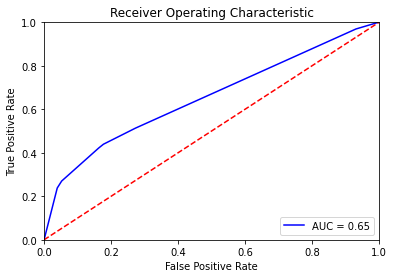

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,best_tree.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,best_tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
importances=best_tree.feature_importances_
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

df_importances = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importances['importance'])
feature= list(df_importances['feature'])
df_importances

,importance,feature
0,0.442361,Municipio_res_Otros
1,0.408226,EDAD
2,0.066742,Municipio_res_NEZAHUALCÓYOTL
3,0.066072,Sexo
4,0.015204,Embarazo
5,0.001396,Municipio_res_GUSTAVO A. MADERO
6,0.000000,Municipio_res_ÁLVARO OBREGÓN
7,0.000000,Municipio_res_XOCHIMILCO
8,0.000000,Municipio_res_VENUSTIANO CARRANZA
9,0.000000,Municipio_res_TLÁHUAC


In [129]:
pd.to_pickle(best_tree,"Tree_hiper.pkl")